<a href="https://colab.research.google.com/github/kinzahassan15/msc_thesis/blob/main/Tuberculosis_Chest_Xray_MSC_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!unzip  /content/drive/MyDrive/tuberculosis_chest_xray_database.zip -d ./datasets

Archive:  /content/drive/MyDrive/tuberculosis_chest_xray_database.zip
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: ./datasets/TB_Chest_Radiography_Database/Normal/Normal-1

In [4]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the path to the dataset
base_dir = './datasets/TB_Chest_Radiography_Database'

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print('Data loaded successfully.')

Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Data loaded successfully.


#RESNET

In [7]:
# Load the ResNet50 model, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Freeze the layers of ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 5s 0us/step


In [8]:

# Train the model
resnet_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)

print('Model trained successfully.')

Epoch 1/50
105/105 [==============================] - 41s 334ms/step - loss: 0.6869 - accuracy: 0.7860 - val_loss: 0.5095 - val_accuracy: 0.8333
Epoch 2/50
105/105 [==============================] - 33s 316ms/step - loss: 0.6650 - accuracy: 0.7914 - val_loss: 0.4456 - val_accuracy: 0.8333
Epoch 3/50
105/105 [==============================] - 34s 319ms/step - loss: 0.6582 - accuracy: 0.7777 - val_loss: 1.2299 - val_accuracy: 0.8333
Epoch 4/50
105/105 [==============================] - 34s 321ms/step - loss: 0.6711 - accuracy: 0.7705 - val_loss: 0.5047 - val_accuracy: 0.8333
Epoch 5/50
105/105 [==============================] - 33s 317ms/step - loss: 0.6099 - accuracy: 0.7952 - val_loss: 0.5044 - val_accuracy: 0.8333
Epoch 6/50
105/105 [==============================] - 33s 318ms/step - loss: 0.6094 - accuracy: 0.7935 - val_loss: 0.4615 - val_accuracy: 0.8333
Epoch 7/50
105/105 [==============================] - 33s 317ms/step - loss: 0.5670 - accuracy: 0.7988 - val_loss: 0.4655 - val_ac

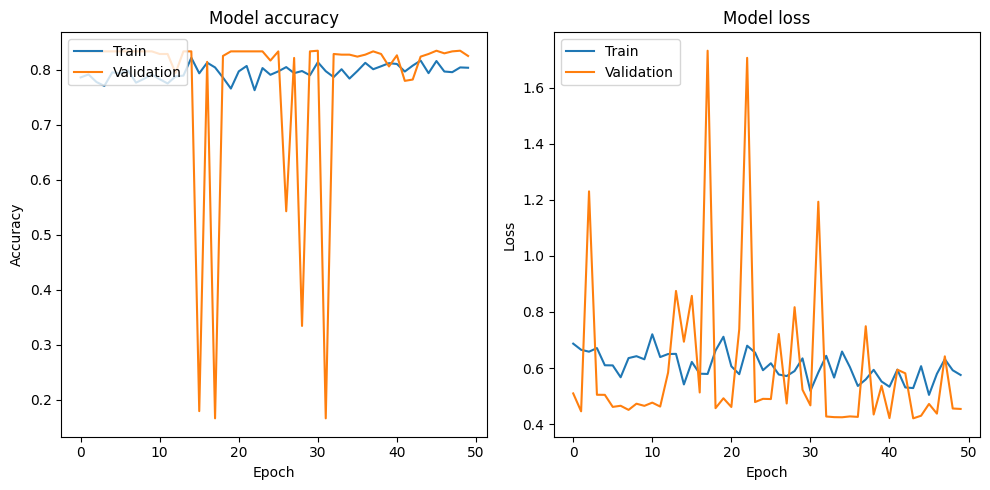

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

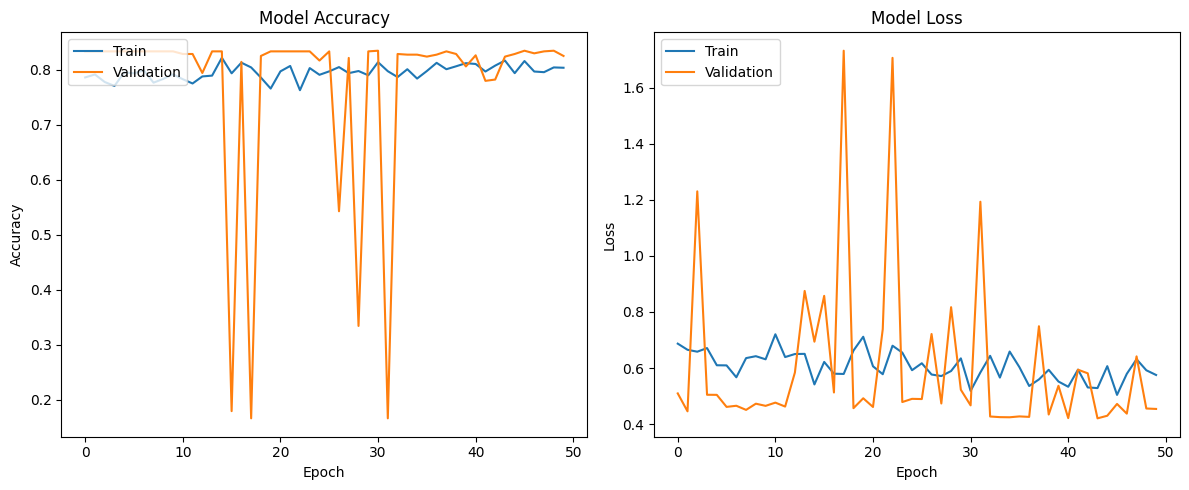

In [10]:

def plot_performance(history):
    metrics = ['accuracy', 'loss']
    titles = ['Model Accuracy', 'Model Loss']
    y_labels = ['Accuracy', 'Loss']

    plt.figure(figsize=(12, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.plot(history.history[metric], label='Train')
        plt.plot(history.history[f'val_{metric}'], label='Validation')
        plt.title(titles[i])
        plt.xlabel('Epoch')
        plt.ylabel(y_labels[i])
        plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Assuming 'resnet_history' is the variable storing the training history
plot_performance(resnet_history)


27/27 [==============================] - 7s 240ms/step
Accuracy: 0.7988095238095239
Precision: 0.7401693889897156
Recall: 0.7988095238095239
F1 Score: 0.7620568359056331


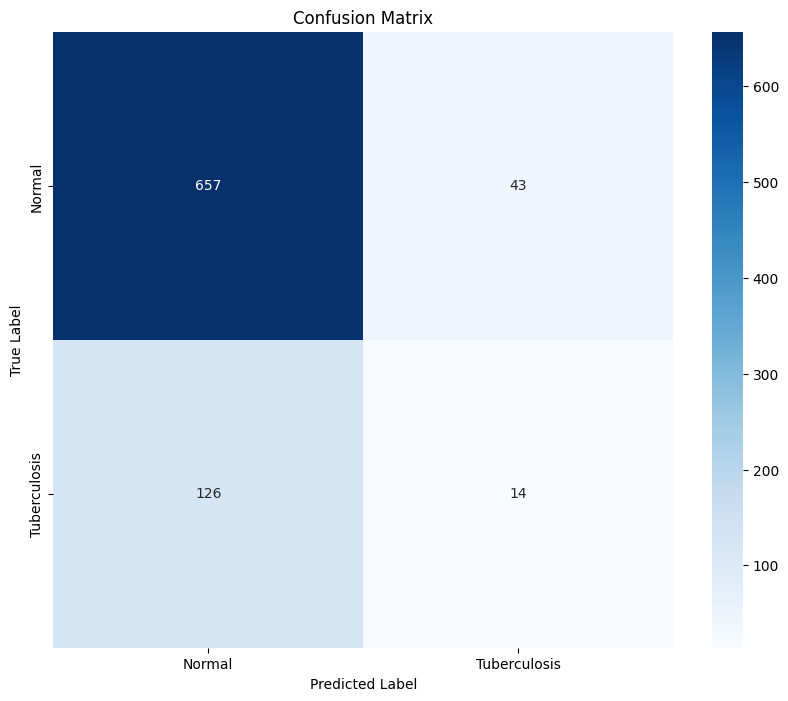

ROC-AUC: 0.4846326530612245
Model evaluation completed.


In [13]:


# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)

# Get the true labels and predictions
validation_generator.reset()
y_true = validation_generator.classes
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 Score:', f1)

# Plot confusion matrix with label names
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate ROC-AUC (if it's a binary classification problem)
if train_generator.num_classes == 2:
    roc_auc = roc_auc_score(y_true, y_pred_prob[:, 1])
    print('ROC-AUC:', roc_auc)
else:
    print('ROC-AUC is not applicable for multi-class classification.')

print('Model evaluation completed.')

#CNN
